In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numbers
% matplotlib inline

In [2]:
path = 'exoplanet.eu_catalog.csv'

In [ ]:
def get_densities(file, othercolumn=None, lower_mass_error=None, upper_mass_error=None,
                  lower_radius_error=None, upper_radius_error=None, minmass=None, maxmass=None,
                  minradius=None, maxradius=None, mindensity=None, maxdensity=None):
    '''Produces an array of densities from an array of masses and radii
    :Arguments:
        *file*
            location of file containing mass(in Jupiter Masses) and radius(in Jupiter Radiuses) dataframes
        *othercolumn*
            name of a column of interest in file; default = None
        *lower_mass_error*
            maximum lower margin of error of mass to be included; default = None
        *upper_mass_error*
            maximum upper margin of error of mass to be included; default = None
        *lower_radius_error*
            maximum lower margin of error of radius to be included; default = None
        *upper_radius_error*
            maximum upper margin of error of radius to be included; default = None
        *minmass*
        *maxmass*
        *minradius*
        *maxradius*
        *mindensity*
        *maxdensity*
    :Returns:
        *df*
            pandas.DataFrame of densities(grams per cubic centimeter) of interest and othercolumn's values
    '''
    f = pd.read_csv(path)

    f = f[np.isfinite(f['mass'])]
    f = f[np.isfinite(f['radius'])]

    rj_to_cm = 7.1492 * 10 ** 9
    mj_to_g = 1.8986 * 10 ** 30

#     if othercolumn is not None:
#         g = f[np.isfinite(f[othercolumn])
#         h = f[[isinstance(a, basestring) for a in f]]
#         f = g + h

    if lower_mass_error is not None:
        f = f[np.isfinite(f['mass_error_min'])]
        f = f[f['mass_error_min'] <= lower_mass_error]
    if upper_mass_error is not None:
        f = f[np.isfinite(f['mass_error_max'])]
        f = f[f['mass_error_max'] <= upper_mass_error]
    if lower_radius_error is not None:
        f = f[np.isfinite(f['radius_error_min'])]
        f = f[f['radius_error_min'] <= lower_radius_error]
    if upper_radius_error is not None:
        f = f[np.isfinite(f['radius_error_max'])]
        f = f[f['radius_error_max'] <= upper_radius_error]

    if minmass is not None:
        f = f[f['mass'] >= minmass]
    if maxmass is not None:
        f = f[f['mass'] <= maxmass]
    if minradius is not None:
        f = f[f['radius'] >= minradius]
    if maxradius is not None:
        f = f[f['radius'] <= maxradius]

    f = pd.DataFrame(f)
    masses = pd.DataFrame(f['mass'])
    radii = pd.Series(f['radius'])

    try:
        assert len(f) != 0
    except AssertionError:
        print 'Nothing matches these parameters'
        return

    try:
        assert len(masses) == len(radii)
    except AssertionError:
        print 'The number of masses is not the same as the number of radii'
        return

    masses = masses * mj_to_g
    volumes = pd.Series(4. / 3 * np.pi * (radii * rj_to_cm) ** 3)
    import pdb
    pdb.set_trace()
    densities = masses.div(volumes.iloc[0])
    densities.columns = ['density']

    ms = pd.DataFrame(f['mass'])
    df = pd.concat([densities, ms], axis=1)
    rs = pd.DataFrame(f['radius'])
    df = pd.concat([df, rs], axis=1)

    if othercolumn is not None:
        other = pd.DataFrame(f[othercolumn])
        df = pd.concat([df, other], axis=1)

    try:
        assert len(df) == len(masses) == len(radii)
    except AssertionError:
        print 'The number of densities is not equal to the number of masses and radii'
        return

    if mindensity is not None:
        df = df[df['density'] >= mindensity]
    if maxdensity is not None:
        df = df[df['density'] <= maxdensity]

    try:
        assert len(f) != 0
    except AssertionError:
        print 'Nothing matches these parameters'
        return

    return df, masses, volumes

In [67]:
ax = df['density'].scatter
# ax.set_xlabel()
# ax.set_ylabel()
# ax.set_title()
# ax.figure.savefig()

AttributeError: 'Series' object has no attribute 'scatter'

In [ ]:
df, m, v = get_densities(path, lower_mass_error=10.0, upper_mass_error=10.0,
                   lower_radius_error=10.0, upper_radius_error=10.0)

In [ ]:
m.div(v.iloc[0])

In [5]:
rj_to_cm = 7.1492 * 10 ** 9
mj_to_g = 1.8986 * 10 ** 30
0.026262*mj_to_g/(4/3*(0.177536*rj_to_cm)**3*np.pi)

7.762109563681222

In [ ]:
0.032576

In [ ]:
4.986124*10**28/8.564892/10**27

In [ ]:
0.177536

In [104]:
f = pd.read_csv(path)
f = f[f['mass'] == 1.000]

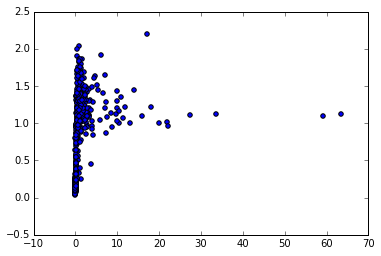

In [10]:
f = pd.read_csv(path)
plt.figure()
plt.scatter(df.mass, df.radius)
# plt.xscale('log')
# plt.yscale('log')

In [101]:
f

,# name,mass,mass_error_min,mass_error_max,mass_sini,mass_sini_error_min,mass_sini_error_max,radius,radius_error_min,radius_error_max,...,star_sp_type,star_age,star_age_error_min,star_age_error_max,star_teff,star_teff_error_min,star_teff_error_max,star_detected_disc,star_magnetic_field,star_alternate_names
0,11 Com b,19.40000,1.500,1.500000,19.40000,1.500,1.500,NaN,NaN,NaN,...,G8 III,NaN,NaN,NaN,4742.0,100.0,100.0,NaN,NaN,NaN
1,11 Oph b,21.00000,3.000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,M9,0.011,0.002,0.002,2375.0,175.0,175.0,NaN,NaN,NaN
2,11 UMi b,10.50000,2.470,2.470000,10.50000,2.470,2.470,NaN,NaN,NaN,...,K4III,1.560,0.540,0.540,4340.0,70.0,70.0,NaN,NaN,NaN
3,14 And b,5.33000,0.570,0.570000,5.33000,0.570,0.570,NaN,NaN,NaN,...,K0III,NaN,NaN,NaN,4813.0,20.0,20.0,NaN,NaN,NaN
4,14 Her b,4.64000,0.190,0.190000,4.64000,0.190,0.190,NaN,NaN,NaN,...,K0 V,5.100,NaN,NaN,5311.0,87.0,87.0,NaN,NaN,NaN
5,16 Cyg B b,1.68000,0.070,0.070000,1.68000,0.070,0.070,NaN,NaN,NaN,...,G2.5 V,8.000,1.800,1.800,5766.0,60.0,60.0,NaN,NaN,NaN
6,18 Del b,10.30000,NaN,NaN,10.30000,NaN,NaN,NaN,NaN,NaN,...,G6III,NaN,NaN,NaN,4979.0,18.0,18.0,NaN,NaN,NaN
7,1RXS 1609 b,14.00000,3.000,2.000000,NaN,NaN,NaN,1.700,NaN,NaN,...,K7V,0.011,0.002,0.002,4060.0,200.0,200.0,NaN,NaN,NaN
8,1SWASP J1407 b,20.00000,6.000,6.000000,20.00000,6.000,6.000,NaN,NaN,NaN,...,NaN,0.016,NaN,NaN,4400.0,100.0,100.0,NaN,NaN,NaN
9,24 Sex b,1.99000,0.380,0.260000,1.99000,0.380,0.260,NaN,NaN,NaN,...,G5,2.700,0.400,0.400,5098.0,44.0,44.0,NaN,NaN,NaN


In [77]:
df

,density,mass,radius
12,4.774648,20.000000,1.000000
13,3.318381,13.900000,1.440000
28,0.112204,0.470000,1.900000
32,0.006270,0.026262,0.177536
52,0.012247,0.051300,0.199000
68,4.058451,17.000000,2.200000
69,1.480141,6.200000,1.910000
70,1.122042,4.700000,1.630000
71,0.245894,1.030000,1.490000
72,0.656514,2.750000,0.970000
